# Exam Simulation

### General Instructions:

This test is composed of **2** different parts, each one addressing a specific topic and accounting for the same amount of points (**16**). In particular, **Part 1** contains general coding questions, **Part 2** is dedicated specifically to data science.<br />

Each part is in turn made of a set of exercises, with each exercise asking you either to answer some questions or to implement a certain function (possibly, you will need to implement your own "helper" functions as well, if doing so makes the overall task simpler to achieve). 
Plus, each exercise accounts for a certain number of points, which you will earn **if and only if** the answer you provide is correct or the implementation you come up with passes successfully **all** the tests (both those that are visible to you and those that are hidden).<br />

To actually write down your implementation, make sure to fill in any place that says <code style="color:green">**_# YOUR CODE HERE_**</code>.<br />
Once you are done, save this notebook and rename it by replacing <code>**YOUR_USERNAME_HERE**</code> suffix with the your actual username. To be consistent, we are expecting your username to be composed by your first name's initial, followed by your full lastname. As an example, in my case <code>**exam-simulation-YOUR_USERNAME_HERE.ipynb**</code> must be saved as <code>**exam-simulation-gmdinunzio.ipynb**</code>.<br />

Finally, go to our [Moodle page](https://elearning.unipd.it/math/course/view.php?id=243) and check for the "_Exam Simulation_" item; there, you will be able to upload your notebook file to be graded.

The archive you have downloaded (<code style="color:magenta">**exam-simulation.zip**</code>) is organized according to the following directory structure:

--<code style="color:red">**exam-simulation**</code> (root)<br />
|----<code style="color:green">**exam-simulation-YOUR_USERNAME_HERE.ipynb**</code> (_this_ notebook)<br />
|----<code style="color:blue">**part-1**</code><br />
|----|----<code>**amazon_reviews.txt**</code><br />
|----<code style="color:blue">**part-2**</code><br />
|----|----<code>**dataset.csv**</code><br />
|----|----<code>**README.txt**</code><br />


In [2]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
%matplotlib inline
import seaborn as sns
from nose.tools import assert_equal

EPSILON = .000001 # tiny tolerance for managing subtle differences resulting from floating point operations

PART_1_DIR = "part-1"
PART_2_DIR = "part-2"
DOCUMENTS_FILE = PART_1_DIR+'/'+"amazon_reviews.txt"
DATASET_FILE = PART_2_DIR+'/'+"dataset.csv"

# Part 1: General Coding (16 points)

## Exercise 1.1 (4 points)

Implement the function <code>**is_palindrome**</code> below, which takes as input a string and returns <code>**True**</code> iff that string is _palindrome_. A string is palindrome if it reads the same, both from left to right and from right to left, e.g., <code>**abba**</code>. Moreover, the empty string <code>**''**</code> is trivially palindrome.

(**NOTE:** You can fairly assume the input string won't ever be_ <code>**None**</code> and won't contain any leading nor trailing whitespace characters.)

In [3]:
def is_palindrome(string):
    """
    Return True iff the input string is palindrome, False otherwise.
    """
    # YOUR CODE HERE
    return string[len(string)::-1] == string
    #raise NotImplementedError()

In [4]:
"""
Test the correctness of the implementation of the `is_palindrome` function
"""

# Tests
assert_equal(True, is_palindrome("abba"))
assert_equal(False, is_palindrome("abracadabra"))
assert_equal(True, is_palindrome(""))
assert_equal(True, is_palindrome("test 2 tset"))

## Exercise 1.2 (2 points)

To solve this exercise, you will need to work with the file <code>**amazon_reviews.txt**</code>, which you will find inside <code style="color:blue">**part-1**</code> directory. This file contains a sample of reviews provided by Amazon customers, with each line representing a single review (i.e., a text document).<br />

As the first thing, implement the function <code>**create_bags_of_words**</code> which returns a dictionary. Each _key_ of this dictionary is the review identifier and the corresponding _value_ is the "bag" (i.e., list) of words contained in that review (document). For the sake of simplicity, you will use the line number as the document ID; for example, the document appearing at the first line of the file will have ID = 1, the second one ID = 2, and so on and so forth.
Each bag of words should be obtained by _tokenizing_ (i.e., splitting) each line using the **whitespace character** (<code>**' '**</code>) as delimiter. In addition, all words in the list must be non-empty (<code>**''**</code>) and they should be properly "normalized", i.e., lowercased.

(**NOTE:** You can assume each document will contain **at least one** non-empty word, i.e., eventually, there won't be any empty document.)

In [5]:
def create_bags_of_words():
    """
    Return a dictionary of the form {doc_id: [w_1, ..., w_n]} from the input file `amazon_reviews.txt`, where:
    - doc_id is the number of line where the documents appear on the file;
    - [w_1, ..., w_n] is the list of the non-empty words of doc_ID, properly lowercased.
    """
    # This is the variable that should be returned
    bags_of_words = {}
    # YOUR CODE HERE
    i = 1
    with open(DOCUMENTS_FILE) as f:
        for line in f:
            bags_of_words[i] = line.lower().split()
            i += 1
            
    # raise NotImplementedError()
    return bags_of_words

In [6]:
"""
Test the correctness of the implementation of the `create_bags_of_words` function
"""

# Call the function to test
bags_of_words = create_bags_of_words()

# Tests
assert_equal(10, len(bags_of_words))
assert_equal(106, len(bags_of_words[1]))
assert_equal(148, len(bags_of_words[2]))
assert_equal(60, len(bags_of_words[3]))
assert_equal(37, len(bags_of_words[4]))
assert_equal(['works', 'fine,', 'but', 'maha', 'energy', 'is', 'better:', 
              'check', 'out', 'maha', "energy's", 'website.', 'their', 
              'powerex', 'mh-c204f', 'charger', 'works', 'in', '100', 
              'minutes', 'for', 'rapid', 'charge,', 'with', 'option', 
              'for', 'slower', 'charge', '(better', 'for', 'batteries).', 
              'and', 'they', 'have', '2200', 'mah', 'batteries.']
             , bags_of_words[4])
assert_equal(['dvd', 'menu', 'select', 'problems:', 'i', 'cannot', 'scroll', 
              'through', 'a', 'dvd', 'menu', 'that', 'is', 'set', 'up', 'vertically.', 
              'the', 'triangle', 'keys', 'will', 'only', 'select', 'horizontally.', 
              'so', 'i', 'cannot', 'select', 'anything', 'on', 'most', "dvd's", 'besides', 
              'play.', 'no', 'special', 'features,', 'no', 'language', 'select,', 'nothing,', 'just', 'play.'], 
             bags_of_words[8])

## Exercise 1.2 (4 points)

Implement the function <code>**clean_bag_of_words**</code> used by <code>**remove_special_characters**</code> below.  The <code>**clean_bag_of_words**</code> function takes as input a bag of words (i.e., a list of words) and returns a new list of _cleaned_ words. In particular, the function will remove any special character (e.g., <code>**.**</code>, <code>**?**</code>, <code>**$**</code>, etc.) appearing anywhere in each word of the original list. The word is kept in the bag iff it is still non-empy after special characters have been successfully removed. For example: 
-  <code>**'lunch!'**</code> ==> <code>**'lunch'**</code>
-  <code>**'midd%le'**</code> ==> <code>**'middle'**</code>
-  <code>**'?!?'**</code> ==> <code>**''**</code> (this cleaned token is empty and therewore won't be included in the bag of words)

(**SUGGESTION:** Use <code>**set(string.punctuation)**</code>, as this contains the set of all special characters we are interested in.)

In [7]:
def clean_bag_of_words(bag_of_words):
    """
    Takes as input a list of words (bag) and returns a new list where original words
    are cleaned, appropriately. Cleaning a word means removing from it *any* occurrence
    of *any* special characters contained in the collection `set(string.punctuation)`.
    Only non-empty cleaned words must be placed in the new, cleaned bag of words to be returned.
    """
    # This is the variable that should be returned
    cleaned_bag_of_words = []
    # YOUR CODE HERE
    punc = ''.join(set(string.punctuation))
    remove = str.maketrans('', '', punc)
    cleaned_bag_of_words = [s.translate(remove) for s in bag_of_words]
    while '' in cleaned_bag_of_words:
        cleaned_bag_of_words.remove('')
    # raise NotImplementedError()
    return cleaned_bag_of_words

def remove_special_characters(bags_of_words):
    """
    This function makes use of `clean_bag_of_words` to clean every document (i.e., every list of words of a document)
    """
    bags_of_cleaned_words = {}
    for doc_id in bags_of_words:
        # Call off to clean_bag_of_words passing the list of words of the current doc id as input
        bags_of_cleaned_words[doc_id] = clean_bag_of_words(bags_of_words[doc_id])
    return bags_of_cleaned_words

In [8]:
# Set bags_of_words so as to allow you to run the tests even if you haven't implemented `create_bags_of_words`
bags_of_words = {1: ['great', 'cd:', 'my', 'lovely', 'pat', 'has', 'one', 'of', 'the', 'great', 'voices', 
                     'of', 'her', 'generation.', 'i', 'have', 'listened', 'to', 'this', 'cd', 'for', 'years', 
                     'and', 'i', 'still', 'love', 'it.', 'when', "i'm", 'in', 'a', 'good', 'mood', 'it', 
                     'makes', 'me', 'feel', 'better.', 'a', 'bad', 'mood', 'just', 'evaporates', 'like', 
                     'sugar', 'in', 'the', 'rain.', 'this', 'cd', 'just', 'oozes', 'life.', 'vocals', 'are', 
                     'jusat', 'stuunning', 'and', 'lyrics', 'just', 'kill.', 'one', 'of', "life's", 'hidden', 
                     'gems.', 'this', 'is', 'a', 'desert', 'isle', 'cd', 'in', 'my', 'book.', 'why', 'she', 
                     'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me.', 'everytime', 'i', 'play', 
                     'this,', 'no', 'matter', 'black,', 'white,', 'young,', 'old,', 'male,', 'female', 
                     'everybody', 'says', 'one', 'thing', '"who', 'was', 'that', 'singing', '?"'], 
                 2: ['one', 'of', 'the', 'best', 'game', 'music', 'soundtracks', '-', 'for', 'a', 'game', 
                     'i', "didn't", 'really', 'play:', 'despite', 'the', 'fact', 'that', 'i', 'have', 
                     'only', 'played', 'a', 'small', 'portion', 'of', 'the', 'game,', 'the', 'music', 'i', 
                     'heard', '(plus', 'the', 'connection', 'to', 'chrono', 'trigger', 'which', 'was', 'great', 
                     'as', 'well)', 'led', 'me', 'to', 'purchase', 'the', 'soundtrack,', 'and', 'it', 'remains', 
                     'one', 'of', 'my', 'favorite', 'albums.', 'there', 'is', 'an', 'incredible', 'mix', 'of', 
                     'fun,', 'epic,', 'and', 'emotional', 'songs.', 'those', 'sad', 'and', 'beautiful', 
                     'tracks', 'i', 'especially', 'like,', 'as', "there's", 'not', 'too', 'many', 'of', 
                     'those', 'kinds', 'of', 'songs', 'in', 'my', 'other', 'video', 'game', 'soundtracks.', 
                     'i', 'must', 'admit', 'that', 'one', 'of', 'the', 'songs', '(life-a', 'distant', 'promise)', 
                     'has', 'brought', 'tears', 'to', 'my', 'eyes', 'on', 'many', 'occasions.my', 'one', 
                     'complaint', 'about', 'this', 'soundtrack', 'is', 'that', 'they', 'use', 'guitar', 
                     'fretting', 'effects', 'in', 'many', 'of', 'the', 'songs,', 'which', 'i', 'find', 
                     'distracting.', 'but', 'even', 'if', 'those', "weren't", 'included', 'i', 'would', 
                     'still', 'consider', 'the', 'collection', 'worth', 'it.'], 
                 3: ['batteries', 'died', 'within', 'a', 'year', '...:', 'i', 'bought', 'this', 'charger', 
                     'in', 'jul', '2003', 'and', 'it', 'worked', 'ok', 'for', 'a', 'while.', 'the', 
                     'design', 'is', 'nice', 'and', 'convenient.', 'however,', 'after', 'about', 'a', 
                     'year,', 'the', 'batteries', 'would', 'not', 'hold', 'a', 'charge.', 'might', 'as', 
                     'well', 'just', 'get', 'alkaline', 'disposables,', 'or', 'look', 'elsewhere', 'for', 
                     'a', 'charger', 'that', 'comes', 'with', 'batteries', 'that', 'have', 'better', 'staying', 
                     'power.'], 
                 4: ['works', 'fine,', 'but', 'maha', 'energy', 'is', 'better:', 'check', 
                     'out', 'maha', "energy's", 'website.', 'their', 'powerex', 'mh-c204f', 
                     'charger', 'works', 'in', '100', 'minutes', 'for', 'rapid', 'charge,', 'with', 
                     'option', 'for', 'slower', 'charge', '(better', 'for', 'batteries).', 'and', 'they', 
                     'have', '2200', 'mah', 'batteries.'], 
                 5: ['great', 'for', 'the', 'non-audiophile:', 'reviewed', 'quite', 'a', 'bit', 'of', 'the', 
                     'combo', 'players', 'and', 'was', 'hesitant', 'due', 'to', 'unfavorable', 'reviews', 
                     'and', 'size', 'of', 'machines.', 'i', 'am', 'weaning', 'off', 'my', 'vhs', 'collection,', 
                     'but', "don't", 'want', 'to', 'replace', 'them', 'with', "dvd's.", 'this', 'unit', 'is', 
                     'well', 'built,', 'easy', 'to', 'setup', 'and', 'resolution', 'and', 'special', 'effects', 
                     '(no', 'progressive', 'scan', 'for', 'hdtv', 'owners)', 'suitable', 'for', 'many', 'people', 
                     'looking', 'for', 'a', 'versatile', 'product.cons-', 'no', 'universal', 'remote.'], 
                 6: ['dvd', 'player', 'crapped', 'out', 'after', 'one', 'year:', 'i', 'also', 'began', 'having', 
                     'the', 'incorrect', 'disc', 'problems', 'that', "i've", 'read', 'about', 'on', 'here.', 
                     'the', 'vcr', 'still', 'works,', 'but', 'hte', 'dvd', 'side', 'is', 'useless.', 'i', 
                     'understand', 'that', 'dvd', 'players', 'sometimes', 'just', 'quit', 'on', 'you,', 'but', 
                     'after', 'not', 'even', 'one', 'year?', 'to', 'me', "that's", 'a', 'sign', 'on', 'bad', 
                     'quality.', "i'm", 'giving', 'up', 'jvc', 'after', 'this', 'as', 'well.', "i'm", 
                     'sticking', 'to', 'sony', 'or', 'giving', 'another', 'brand', 'a', 'shot.'], 
                 7: ['incorrect', 'disc:', 'i', 'love', 'the', 'style', 'of', 'this,', 'but', 'after', 'a', 
                     'couple', 'years,', 'the', 'dvd', 'is', 'giving', 'me', 'problems.', 'it', "doesn't", 
                     'even', 'work', 'anymore', 'and', 'i', 'use', 'my', 'broken', 'ps2', 'now.', 'i', 
                     "wouldn't", 'recommend', 'this,', "i'm", 'just', 'going', 'to', 'upgrade', 'to', 'a', 
                     'recorder', 'now.', 'i', 'wish', 'it', 'would', 'work', 'but', 'i', 'guess', "i'm", 
                     'giving', 'up', 'on', 'jvc.', 'i', 'really', 'did', 'like', 'this', 'one...', 'before', 
                     'it', 'stopped', 'working.', 'the', 'dvd', 'player', 'gave', 'me', 'problems', 'probably', 
                     'after', 'a', 'year', 'of', 'having', 'it.'], 
                 8: ['dvd', 'menu', 'select', 'problems:', 'i', 'cannot', 'scroll', 'through', 'a', 'dvd', 
                     'menu', 'that', 'is', 'set', 'up', 'vertically.', 'the', 'triangle', 'keys', 'will', 
                     'only', 'select', 'horizontally.', 'so', 'i', 'cannot', 'select', 'anything', 'on', 
                     'most', "dvd's", 'besides', 'play.', 'no', 'special', 'features,', 'no', 'language', 
                     'select,', 'nothing,', 'just', 'play.'], 
                 9: ['unique', 'weird', 'orientalia', 'from', 'the', "1930's:", 'exotic', 'tales', 'of', 
                     'the', 'orient', 'from', 'the', "1930's.", '"dr', 'shen', 'fu",', 'a', 'weird', 
                     'tales', 'magazine', 'reprint,', 'is', 'about', 'the', 'elixir', 'of', 'life', 'that', 
                     'grants', 'immortality', 'at', 'a', 'price.', 'if', "you're", 'tired', 'of', 'modern', 
                     'authors', 'who', 'all', 'sound', 'alike,', 'this', 'is', 'the', 'antidote', 'for', 
                     'you.', "owen's", 'palette', 'is', 'loaded', 'with', 'splashes', 'of', 'chinese', 'and', 
                     'japanese', 'colours.', 'marvelous.'], 
                 10: ['not', 'an', '"ultimate', 'guide":', 'firstly,i', 'enjoyed', 'the', 'format', 'and', 
                      'tone', 'of', 'the', 'book', '(how', 'the', 'author', 'addressed', 'the', 'reader).', 
                      'however,', 'i', 'did', 'not', 'feel', 'that', 'she', 'imparted', 'any', 'insider', 
                      'secrets', 'that', 'the', 'book', 'promised', 'to', 'reveal.', 'if', 'you', 'are', 
                      'just', 'starting', 'to', 'research', 'law', 'school,', 'and', 'do', 'not', 'know', 
                      'all', 'the', 'requirements', 'of', 'admission,', 'then', 'this', 'book', 'may', 'be', 
                      'a', 'tremendous', 'help.', 'if', 'you', 'have', 'done', 'your', 'homework', 'and', 
                      'are', 'looking', 'for', 'an', 'edge', 'when', 'it', 'comes', 'to', 'admissions,', 'i', 
                      'recommend', 'some', 'more', 'topic-specific', 'books.', 'for', 'example,', 'books', 
                      'on', 'how', 'to', 'write', 'your', 'personal', 'statment,', 'books', 'geared', 
                      'specifically', 'towards', 'lsat', 'preparation', '(powerscore', 'books', 'were', 
                      'the', 'most', 'helpful', 'for', 'me),', 'and', 'there', 'are', 'some', 'websites', 
                      'with', 'great', 'advice', 'geared', 'towards', 'aiding', 'the', 'individuals', 
                      'whom', 'you', 'are', 'asking', 'to', 'write', 'letters', 'of', 'recommendation.', 
                      'yet,', 'for', 'those', 'new', 'to', 'the', 'entire', 'affair,', 'this', 'book', 
                      'can', 'definitely', 'clarify', 'the', 'requirements', 'for', 'you.']}

In [9]:
"""
Test the correctness of the implementation of the `clean_bag_of_words` function
"""

# Call the function to test
cleaned_bags_of_words = remove_special_characters(bags_of_words)

# Tests
assert_equal(10, len(cleaned_bags_of_words))
assert_equal(105, len(cleaned_bags_of_words[1]))
assert_equal(59, len(cleaned_bags_of_words[3]))
assert_equal(['one', 'of', 'the', 'best', 'game', 'music', 'soundtracks', 'for', 'a', 'game', 
              'i', 'didnt', 'really', 'play', 'despite', 'the', 'fact', 'that', 'i', 'have', 
              'only', 'played', 'a', 'small', 'portion', 'of', 'the', 'game', 'the', 'music', 'i', 
              'heard', 'plus', 'the', 'connection', 'to', 'chrono', 'trigger', 'which', 'was', 
              'great', 'as', 'well', 'led', 'me', 'to', 'purchase', 'the', 'soundtrack', 'and', 
              'it', 'remains', 'one', 'of', 'my', 'favorite', 'albums', 'there', 'is', 'an', 
              'incredible', 'mix', 'of', 'fun', 'epic', 'and', 'emotional', 'songs', 'those', 'sad', 
              'and', 'beautiful', 'tracks', 'i', 'especially', 'like', 'as', 'theres', 'not', 'too', 
              'many', 'of', 'those', 'kinds', 'of', 'songs', 'in', 'my', 'other', 'video', 'game', 
              'soundtracks', 'i', 'must', 'admit', 'that', 'one', 'of', 'the', 'songs', 'lifea', 
              'distant', 'promise', 'has', 'brought', 'tears', 'to', 'my', 'eyes', 'on', 'many', 
              'occasionsmy', 'one', 'complaint', 'about', 'this', 'soundtrack', 'is', 'that', 'they', 
              'use', 'guitar', 'fretting', 'effects', 'in', 'many', 'of', 'the', 'songs', 'which', 
              'i', 'find', 'distracting', 'but', 'even', 'if', 'those', 'werent', 'included', 'i', 
              'would', 'still', 'consider', 'the', 'collection', 'worth', 'it'], 
             cleaned_bags_of_words[2])
assert_equal(['dvd', 'menu', 'select', 'problems', 'i', 'cannot', 'scroll', 'through', 'a', 'dvd', 
              'menu', 'that', 'is', 'set', 'up', 'vertically', 'the', 'triangle', 'keys', 'will', 
              'only', 'select', 'horizontally', 'so', 'i', 'cannot', 'select', 'anything', 'on', 'most', 
              'dvds', 'besides', 'play', 'no', 'special', 'features', 'no', 'language', 'select', 'nothing', 
              'just', 'play'], 
             cleaned_bags_of_words[8])

## Exercise 1.3 (7 points)

Implement the **4** functions below:
-  <code>**term_freq**</code> 
-  <code>**create_idf_vector**</code>
-  <code>**create_doc_tf_vector**</code>
-  <code>**create_doc_term_matrix_tf_idf**</code>

Each function above is a small brick which is used to achieve the overall task of building a document-term matrix using the _tf-idf_ weighting scheme. To simplify this, you are given a useful data structure called **inverted_index**, which has been built in advance for you.
A **document-term matrix** is an $m$-by-$n$ matrix where $m$ is the number of documents in the collection and $n$ the number of all terms (i.e., the size of the **vocabulary**). Each row of the matrix is therefore a document; each document is in turn represented by an $n$-dimensional vector (i.e., one dimension for each term in the vocabulary).
Each dimension of a document vector is computed using the $tf$-$idf$ score, which is computed as the product of two scores: $tf$-$idf$ = $tf$ * $idf$. In other words, given the document $d$ its corresponding vector is computed as follows:
$$
d[i] = tf(i, d) * idf(i),~i\in {1, \ldots, n}
$$

The first score $tf(i, d)$ is computed _locally_ to the document and measures the frequency of term $i$ in document $d$ (it will be 0 if $d$ does not contain $i$). The second score $idf(i)$, instead, measures the (smoothed) *inverse document frequency* of the term $i$. This is computed as follows:

$$
idf(i) = \log \Big(1 + \frac{m}{m_i}\Big)
$$
where $m$ is the total number of documents in the collection and $m_i$ is the number of documents containing the term $i$.

In [62]:
def term_freq(term, doc_id, inverted_index):
    """
    Takes as input a term, a doc id and the inverted index.
    Returns an integer representing the frequency of the input term in the input doc id, using the inverted index.
    If the term is not present in the inverted index, the function returns None.
    If the term is in the inverted index but it is not in the doc id, the function returns 0.
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    if term not in inverted_index:
        return None
    elif term in inverted_index and term not in cleaned_bags_of_words[doc_id]:
        return 0
    else:
        freq = 0
        for i in range(len(cleaned_bags_of_words[doc_id])):
            if term == cleaned_bags_of_words[doc_id][i]:
                freq += 1
        return freq
        
    

    
def create_idf_vector(n_docs, vocabulary, inverted_index):
    """
    Return a "global" idf vector, i.e., an n-dimensional numpy array where n = |vocabulary|.
    Each entry of this vector is the idf score of a vocabulary term.
    Remember that (smoothed) inverse document frequency of a term is computed as follows:
    idf(term) = log(1 + m/m_term) where m = |documents|, m_term = |documents containing term|
    To do so, the function takes as input:
    - m = n_docs (the total number of documents in the collection),
    - vocabulary (the list of terms extracted from the whole collection of documents)
    - inverted_index (a dictionary that maps each term of the vocabulary into another dictionary
    containing the doc id as key and the term frequency as value). 
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    global_idf = [0] * len(vocabulary)
    for i in range(len(vocabulary)):
        global_idf[i] = np.log(1 + n_docs/len(inverted_index[vocabulary[i]]))
    idf = np.array(global_idf)
    return idf
    
    
    

def create_doc_tf_vector(doc_id, vocabulary, inverted_index):
    """
    Return a "local" term frequency vector representing doc id, 
    i.e., an n-dimensional numpy array where n = |vocabulary|.
    Use the vocabulary and the inverted index.
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    local_tf = [0] * len(vocabulary)
    for i in range(len(vocabulary)):
        local_tf[i] = term_freq(vocabulary[i], doc_id, inverted_index)
    tf = np.array(local_tf)
    return tf
    
    

def create_doc_term_matrix_tf_idf(cleaned_bags_of_words, vocabulary, inverted_index):
    """
    Return a document-term matrix, i.e., an m-by-n numpy array where m = |documents|, n = |vocabulary|
    Each row of the matrix corresponds to the tf-idf vector of a document.
    A tf-idf vector is just the result of the element-wise multiplication of the tf vector (of a document)
    and the idf vector (which is the same for *all* documents).
    """
    
    # Number m of documents
    m = len(cleaned_bags_of_words)
    # Number n of terms in the vocabulary
    n = len(vocabulary)
    
    # Initialize the document-term matrix to an empty list 
    # (eventually, it will be a list of list where each list is a row of the document-term matrix)
    tf_idf_doc_term_matrix = []
    
    # Compute the global idf vector for all the terms in the vocabulary (once for all)
    idf_vector = create_idf_vector(m, vocabulary, inverted_index)
    
    # Compute the tf-idf vector for each document of the collection (i.e., each row of the matrix)
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(1, m+1):
        tf_idf_doc_term_matrix.append(create_doc_tf_vector(i, vocabulary, inverted_index) * idf_vector)
    
    return np.array(tf_idf_doc_term_matrix)



In [63]:
# Function used to create the inverted index
def create_inverted_index_term_freq(cleaned_bags_of_words):
    """
    Return the inverted index built from the bags of words representing the collection of documents.
    The inverted index contains an entry for each word (term) appearing in the collection; 
    for each word, it contains a dictionary whose key is the document ID where that word appears 
    and the value is the number of times (i.e., frequency) of that term in that document.
    Example:
    {
    'ananas': {3: 1, 6: 2},
    ...
    'zoo': {10:5}
    }
    In the example above, the term 'ananas' appears 1 time in doc ID 3 and 2 times in doc ID 6.
    The term 'zoo', instead, appears 5 times in doc ID 10
    """
    inverted_index = {}
    for doc_id, words in cleaned_bags_of_words.items(): 
        word_freq = {}
        for word in words:
            word_freq[word] = word_freq.get(word, 0) + 1
            if word in inverted_index:
                inverted_index[word][doc_id] = word_freq[word]
            else:
                inverted_index[word] = {}
                inverted_index[word][doc_id] = word_freq[word]
    return inverted_index


# Set cleaned_bags_of_words so as to allow you to run the tests even if you haven't implemented `clean_bag_of_words`
cleaned_bags_of_words = {1: ['great', 'cd', 'my', 'lovely', 'pat', 'has', 'one', 'of', 'the', 'great', 'voices', 
                             'of', 'her', 'generation', 'i', 'have', 'listened', 'to', 'this', 'cd', 'for', 
                             'years', 'and', 'i', 'still', 'love', 'it', 'when', 'im', 'in', 'a', 'good', 
                             'mood', 'it', 'makes', 'me', 'feel', 'better', 'a', 'bad', 'mood', 'just', 'evaporates', 
                             'like', 'sugar', 'in', 'the', 'rain', 'this', 'cd', 'just', 'oozes', 'life', 'vocals', 
                             'are', 'jusat', 'stuunning', 'and', 'lyrics', 'just', 'kill', 'one', 'of', 'lifes', 
                             'hidden', 'gems', 'this', 'is', 'a', 'desert', 'isle', 'cd', 'in', 'my', 'book', 
                             'why', 'she', 'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me', 'everytime', 
                             'i', 'play', 'this', 'no', 'matter', 'black', 'white', 'young', 'old', 'male', 
                             'female', 'everybody', 'says', 'one', 'thing', 'who', 'was', 'that', 'singing'], 
                         2: ['one', 'of', 'the', 'best', 'game', 'music', 'soundtracks', 'for', 'a', 'game', 'i', 
                             'didnt', 'really', 'play', 'despite', 'the', 'fact', 'that', 'i', 'have', 'only', 
                             'played', 'a', 'small', 'portion', 'of', 'the', 'game', 'the', 'music', 'i', 'heard', 
                             'plus', 'the', 'connection', 'to', 'chrono', 'trigger', 'which', 'was', 'great', 'as', 
                             'well', 'led', 'me', 'to', 'purchase', 'the', 'soundtrack', 'and', 'it', 'remains', 
                             'one', 'of', 'my', 'favorite', 'albums', 'there', 'is', 'an', 'incredible', 'mix', 
                             'of', 'fun', 'epic', 'and', 'emotional', 'songs', 'those', 'sad', 'and', 'beautiful', 
                             'tracks', 'i', 'especially', 'like', 'as', 'theres', 'not', 'too', 'many', 'of', 
                             'those', 'kinds', 'of', 'songs', 'in', 'my', 'other', 'video', 'game', 'soundtracks', 
                             'i', 'must', 'admit', 'that', 'one', 'of', 'the', 'songs', 'lifea', 'distant', 'promise', 
                             'has', 'brought', 'tears', 'to', 'my', 'eyes', 'on', 'many', 'occasionsmy', 'one', 
                             'complaint', 'about', 'this', 'soundtrack', 'is', 'that', 'they', 'use', 'guitar', 
                             'fretting', 'effects', 'in', 'many', 'of', 'the', 'songs', 'which', 'i', 'find', 
                             'distracting', 'but', 'even', 'if', 'those', 'werent', 'included', 'i', 'would', 
                             'still', 'consider', 'the', 'collection', 'worth', 'it'], 
                         3: ['batteries', 'died', 'within', 'a', 'year', 'i', 'bought', 'this', 'charger', 'in', 
                             'jul', '2003', 'and', 'it', 'worked', 'ok', 'for', 'a', 'while', 'the', 'design', 
                             'is', 'nice', 'and', 'convenient', 'however', 'after', 'about', 'a', 'year', 'the', 
                             'batteries', 'would', 'not', 'hold', 'a', 'charge', 'might', 'as', 'well', 'just', 
                             'get', 'alkaline', 'disposables', 'or', 'look', 'elsewhere', 'for', 'a', 'charger', 
                             'that', 'comes', 'with', 'batteries', 'that', 'have', 'better', 'staying', 'power'], 
                         4: ['works', 'fine', 'but', 'maha', 'energy', 'is', 'better', 'check', 'out', 'maha', 
                             'energys', 'website', 'their', 'powerex', 'mhc204f', 'charger', 'works', 'in', '100', 
                             'minutes', 'for', 'rapid', 'charge', 'with', 'option', 'for', 'slower', 'charge', 
                             'better', 'for', 'batteries', 'and', 'they', 'have', '2200', 'mah', 'batteries'], 
                         5: ['great', 'for', 'the', 'nonaudiophile', 'reviewed', 'quite', 'a', 'bit', 'of', 
                             'the', 'combo', 'players', 'and', 'was', 'hesitant', 'due', 'to', 'unfavorable', 
                             'reviews', 'and', 'size', 'of', 'machines', 'i', 'am', 'weaning', 'off', 'my', 
                             'vhs', 'collection', 'but', 'dont', 'want', 'to', 'replace', 'them', 'with', 
                             'dvds', 'this', 'unit', 'is', 'well', 'built', 'easy', 'to', 'setup', 'and', 
                             'resolution', 'and', 'special', 'effects', 'no', 'progressive', 'scan', 'for', 
                             'hdtv', 'owners', 'suitable', 'for', 'many', 'people', 'looking', 'for', 'a', 
                             'versatile', 'productcons', 'no', 'universal', 'remote'], 
                         6: ['dvd', 'player', 'crapped', 'out', 'after', 'one', 'year', 'i', 'also', 'began', 
                             'having', 'the', 'incorrect', 'disc', 'problems', 'that', 'ive', 'read', 'about', 
                             'on', 'here', 'the', 'vcr', 'still', 'works', 'but', 'hte', 'dvd', 'side', 'is', 
                             'useless', 'i', 'understand', 'that', 'dvd', 'players', 'sometimes', 'just', 'quit', 
                             'on', 'you', 'but', 'after', 'not', 'even', 'one', 'year', 'to', 'me', 'thats', 'a', 
                             'sign', 'on', 'bad', 'quality', 'im', 'giving', 'up', 'jvc', 'after', 'this', 'as', 
                             'well', 'im', 'sticking', 'to', 'sony', 'or', 'giving', 'another', 'brand', 'a', 'shot'], 
                         7: ['incorrect', 'disc', 'i', 'love', 'the', 'style', 'of', 'this', 'but', 'after', 'a', 
                             'couple', 'years', 'the', 'dvd', 'is', 'giving', 'me', 'problems', 'it', 'doesnt', 'even', 
                             'work', 'anymore', 'and', 'i', 'use', 'my', 'broken', 'ps2', 'now', 'i', 'wouldnt', 
                             'recommend', 'this', 'im', 'just', 'going', 'to', 'upgrade', 'to', 'a', 'recorder', 
                             'now', 'i', 'wish', 'it', 'would', 'work', 'but', 'i', 'guess', 'im', 'giving', 'up', 
                             'on', 'jvc', 'i', 'really', 'did', 'like', 'this', 'one', 'before', 'it', 'stopped', 
                             'working', 'the', 'dvd', 'player', 'gave', 'me', 'problems', 'probably', 'after', 'a', 
                             'year', 'of', 'having', 'it'], 
                         8: ['dvd', 'menu', 'select', 'problems', 'i', 'cannot', 'scroll', 'through', 'a', 'dvd', 
                             'menu', 'that', 'is', 'set', 'up', 'vertically', 'the', 'triangle', 'keys', 'will', 
                             'only', 'select', 'horizontally', 'so', 'i', 'cannot', 'select', 'anything', 'on', 
                             'most', 'dvds', 'besides', 'play', 'no', 'special', 'features', 'no', 'language', 
                             'select', 'nothing', 'just', 'play'], 
                         9: ['unique', 'weird', 'orientalia', 'from', 'the', '1930s', 'exotic', 'tales', 'of', 
                             'the', 'orient', 'from', 'the', '1930s', 'dr', 'shen', 'fu', 'a', 'weird', 'tales', 
                             'magazine', 'reprint', 'is', 'about', 'the', 'elixir', 'of', 'life', 'that', 'grants', 
                             'immortality', 'at', 'a', 'price', 'if', 'youre', 'tired', 'of', 'modern', 'authors', 
                             'who', 'all', 'sound', 'alike', 'this', 'is', 'the', 'antidote', 'for', 'you', 'owens', 
                             'palette', 'is', 'loaded', 'with', 'splashes', 'of', 'chinese', 'and', 'japanese', 
                             'colours', 'marvelous'], 
                         10: ['not', 'an', 'ultimate', 'guide', 'firstlyi', 'enjoyed', 'the', 'format', 'and', 
                              'tone', 'of', 'the', 'book', 'how', 'the', 'author', 'addressed', 'the', 'reader', 
                              'however', 'i', 'did', 'not', 'feel', 'that', 'she', 'imparted', 'any', 'insider', 
                              'secrets', 'that', 'the', 'book', 'promised', 'to', 'reveal', 'if', 'you', 'are', 
                              'just', 'starting', 'to', 'research', 'law', 'school', 'and', 'do', 'not', 'know', 
                              'all', 'the', 'requirements', 'of', 'admission', 'then', 'this', 'book', 'may', 'be', 
                              'a', 'tremendous', 'help', 'if', 'you', 'have', 'done', 'your', 'homework', 'and', 
                              'are', 'looking', 'for', 'an', 'edge', 'when', 'it', 'comes', 'to', 'admissions', 
                              'i', 'recommend', 'some', 'more', 'topicspecific', 'books', 'for', 'example', 'books', 
                              'on', 'how', 'to', 'write', 'your', 'personal', 'statment', 'books', 'geared', 
                              'specifically', 'towards', 'lsat', 'preparation', 'powerscore', 'books', 'were', 
                              'the', 'most', 'helpful', 'for', 'me', 'and', 'there', 'are', 'some', 'websites', 
                              'with', 'great', 'advice', 'geared', 'towards', 'aiding', 'the', 'individuals', 
                              'whom', 'you', 'are', 'asking', 'to', 'write', 'letters', 'of', 'recommendation', 
                              'yet', 'for', 'those', 'new', 'to', 'the', 'entire', 'affair', 'this', 'book', 'can', 
                              'definitely', 'clarify', 'the', 'requirements', 'for', 'you']}

# Make use of the function for creating the inverted index (already implemented)
inverted_index = create_inverted_index_term_freq(cleaned_bags_of_words)

# Extract the vocabulary from the inverted index
vocabulary = sorted(inverted_index.keys())

# Number of documents in the collection
m = len(cleaned_bags_of_words)

# Number n of terms in the vocabulary
n = len(vocabulary)

In [64]:
"""
Test the correctness of the implementation of the `term_freq` function
"""

# Tests
# Correct term frequency
assert_equal(1, term_freq("despite", 2, inverted_index))
# Correct term frequency
assert_equal(4, term_freq("cd", 1, inverted_index))
# Term frequency of a word that is not in the inverted index should return None
assert_equal(None, term_freq("apple", 4, inverted_index))
# Term frequency of a word that IS in the inverted index but not in the input document should return 0
assert_equal(0, term_freq("rapid", 9, inverted_index))

In [65]:
"""
Test the correctness of the implementation of the `create_idf_vector` function
"""

# Tests
# Correct idf vector length
assert_equal(n, create_idf_vector(m, vocabulary, inverted_index).size) 
# Correct idf vector (first 10 entries)
assert_equal(True, 
             np.all(
                 np.abs(
                     np.array([2.39789527,  2.39789527,  2.39789527,  2.39789527,  0.7472144 ,
                               1.25276297,  2.39789527,  2.39789527,  2.39789527,  2.39789527]) - 
                     create_idf_vector(m, vocabulary, inverted_index)[:10]
                 ) 
                 < EPSILON)
            )

In [66]:
"""
Test the correctness of the implementation of the `create_doc_tf_vector` function
(depends on `term_freq`)
"""

# Tests
# Correct document vector length
assert_equal([n for i in range(1, m+1)], 
             [create_doc_tf_vector(i, vocabulary, inverted_index).size for i in range(1,m+1)]
            )
# Correct document ID 2 term-frequency vector (first 10 entries)
assert_equal(True, 
             np.all(np.array([0, 0, 0, 0, 2, 1, 0, 0, 0, 1]) 
                    == 
                    create_doc_tf_vector(2, vocabulary, inverted_index)[:10])
            )


In [68]:
"""
Test the correctness of the implementation of the `create_doc_term_matrix_tf_idf` function
"""

# Call the function
matrix = create_doc_term_matrix_tf_idf(cleaned_bags_of_words, vocabulary, inverted_index)

# Tests
# Correct shape of the resulting matrix
assert_equal((m, n), matrix.shape)
# Correct (i,j) entry of the matrix corresponding to doc ID 6 and 43rd term
assert_equal(0, matrix[5, 42])
# Correct (i,j) entry of the matrix corresponding to doc ID 3 and 13rd term
assert_equal(True, (1.4663370687934272 - matrix[2, 12] < EPSILON))
# Correct document ID 7 tf-idf vector (first 20 entries)
assert_equal(True, 
             np.all(
                 np.abs(
                     np.array([0.        ,  0.        ,  0.        ,  0.        ,  2.24164321,
                              0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
                              0.        ,  0.        ,  2.93267414,  0.        ,  0.        ,
                              0.        ,  0.        ,  0.        ,  0.        ,  0.        ]) -
                     matrix[6][:20]
                 )
                 < EPSILON)
            )


# Part 2: Data Science (16 points)

In [58]:
# Load the dataset stored at `DATASET_FILE` using "," as field separator
data = pd.read_csv(DATASET_FILE, 
                   sep=",", 
                   header=None, 
                   names=['f{}'.format(i) for i in range(1, 16)]+['label'])

In [59]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Exercise 2.1 (2 points)

Implement the function <code>**modify_dataset**</code> below, which is responsible for modifying the <code>**pandas.DataFrame**</code> object loaded in the cell right above.<br />
Such a dataset has **37 instances** which contain **at least one** missing value (indicated with the <code>**'?'**</code> symbol) and spread across **7 features** (i.e., columns), according to the <code>**README.txt**</code>. You should properly change those fields denoted by <code>**'?'**</code> into actual missing values.<br />
Finally, you are asked to substitute <code>**'+'**</code>/<code>**'-'**</code> values of the <code>**label**</code> column with <code>**1**</code>/<code>**-1**</code>, respectively.

In [60]:
def modify_dataset(data):
    """
    Deal with missing header row by providing one and handle missing values denoted by '?'.
    """
    # YOUR CODE HERE
    data.replace('?', np.nan, inplace=True)
    data['label'].replace({'+':1, '-':-1}, inplace=True)
    
    # raise NotImplementedError()
    return data

In [61]:
"""
Test the correctness of the implementation of the `load_dataset` function
"""

data = modify_dataset(data)

assert_equal((690, 16), data.shape)
assert_equal(True, data.isnull().any().any())
assert_equal(37, data.isnull().any(axis=1).sum())
assert_equal(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 
             'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'label'],
            list(data.columns.values))
assert_equal(307, data[data.label == 1].shape[0])

## Exercise 2.2 (3 points)

Implement the function <code>**fill_missing_value**</code> below. This takes as input a <code>**pandas.DataFrame**</code> object and returns a new <code>**pandas.DataFrame**</code> where **all** existing missing values are replaced according to the following rule:
-  If a missing value refers to a **numerical column**, then it must be replaced with the **median** computed across that column
-  If a missing value refers to a **categorical column**, then it must be replaced with the **mode** computed across that column

In [62]:
# is_numeric_dtype(pandas.Series) returns True iff the dtype associated with the pandas.Series passed as input is numeric
from pandas.api.types import is_numeric_dtype

def fill_missing_values(data):
    """
    Input: pandas.DataFrame (data)
    Output: pandas.DataFrame
    
    Return a DataFrame where ALL existing missing values are replaced according to the following rule:
    - If a missing value refers to a numerical column, then it must be replaced with the median of that column
    - If a missing value refers to a categorical column, then it must be replaced with the mode of that column
    """
    for column in data.columns:
        if is_numeric_dtype(data[column]):
            data[column] = data[column].fillna(data[column].median())
        else:
            data[column] = data[column].fillna(data[column].mode().iloc[0])
    return data
    # YOUR CODE HERE
    # raise NotImplementedError()
    

In [63]:
"""
Test the correctness of the implementation of the `fill_missing_values` function
"""

data = fill_missing_values(data)

assert_equal(False, data.isnull().any().any())


## Exercise 2.3 (3 points)

Implement the function <code>**slice_data**</code> below. This takes as input a <code>**pandas.DataFrame**</code> object and returns a _sliced_ <code>**pandas.DataFrame**</code> which contains **all** the _positive_ instances whose value of the feature labeled as <code>**f3**</code> is greater than the mean of _that_ feature.

In [64]:
def slice_data(data):
    """
    Input: pandas.DataFrame (data)
    Output: pandas.DataFrame
    
    Return a sliced DataFrame which contains **all** the positive instances 
    whose value of the feature labeled as <code>**f3**</code> is greater than the mean of that feature
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    mean_f3 = data['f3'].mean()
    slice_data = data.loc[(data['f3'] > mean_f3) & (data['label'] == 1)]
    return slice_data

In [65]:
"""
Test the correctness of the implementation of the `slice_data` function
"""

sliced_data = slice_data(data)

assert_equal(True, (sliced_data.f3 > 4.7587246376811585).all())
assert_equal(True, (sliced_data.label == 1).all())


## Exercise 2.4 (6 points)

This exercise is made of **3** questions, which you can answer independently to each other.

### Question 1 (1 point)

Feature labeled as <code>**f5**</code> represents a categorical variable which can take on **3** distinct values: <code>**g**</code>, <code>**p**</code>, and <code>**g**</code>. Assign to the variable <code>**count_p**</code> below the total number of instances in the dataset whose value of <code>**f5**</code> is <code>**p**</code>

In [67]:
print(data['f5'].value_counts())
count_p = len(data['f5'].loc[data['f5']=='p'])

# YOUR CODE HERE
#raise NotImplementedError()

g     525
p     163
gg      2
Name: f5, dtype: int64


In [68]:
"""
Test the correctness of the `count_p`
"""

assert_equal(False, (count_p == None))


### Question 2 (1 point)

Plot the distribution of feature <code>**f8**</code> (i.e., using <code>**seaborn.distplot**</code> method, along with its density estimate) and assign the result of the plot to the variable <code>**dist_plot_f8**</code>. In addition to that, set the variable <code>**is_f8_normal**</code> to either <code>**True**</code> or <code>**False**</code> depending on whether the distribution you obtain looks more like a Gaussian (Normal) distribution or not.

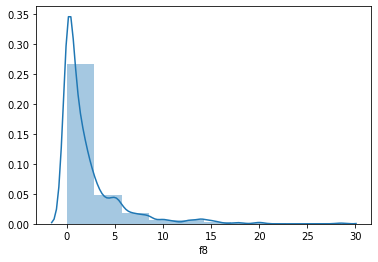

In [71]:
dist_plot_f8 = None
is_f8_normal = None

# YOUR CODE HERE
dist_plot_f8 = sns.distplot(data['f8'], bins = 10)
is_f8_normal = False
# raise NotImplementedError()

In [72]:
"""
Test the correctness of `dist_plot_f8` and `is_f8_normal`
"""

assert_equal(False, (dist_plot_f8 == None))
assert_equal(False, (is_f8_normal == None))


### Question 3 (4 points)

Suppose you want to verify whether features <code>**f3**</code> and <code>**f15**</code> suffer from the presence of _outliers_. To do so, you need to visualize the boxplots of both those variables (i.e., using <code>**seaborn.boxplot**</code> method); each plot should be assigned to the two variable below: <code>**box_plot_f3**</code> and <code>**box_plot_f15**</code>. Once plots are ready, you should assign the variable <code>**col_outliers**</code> a list of column labels, corresponding to the names of the columns you believe are containing outliers. As such, <code>**col_outliers**</code> may take on **4** possible values: 
-  <code>**[]**</code> if both <code>**f3**</code> and <code>**f15**</code> **do not** contain any outlier;
-  <code>**['f3']**</code> if **only** <code>**f3**</code> contains any outlier;
-  <code>**['f15']**</code> if **only** <code>**f15**</code> contains any outlier;
-  <code>**['f3', 'f15']**</code> if both <code>**f3**</code> and <code>**f15**</code> **do** have outliers.

Once you have successfully valued those three variables, you are asked to implement the function <code>**log_smooth_outliers**</code> below, which takes as input a <code>**pandas.DataFrame**</code> and a list of column labels that need to be log-transformed. For each <code>**{COL_NAME}**</code> in the list you need to create a **new** column in the dataframe, whose label name is <code>**'log_'+{COL_NAME}**</code> and whose value is the _smoothed_ logarithm of the original value in <code>**{COL_NAME}**</code>. The smoothed logarithm transformation of a value $x$ is computed as $\log(x + 1)$.

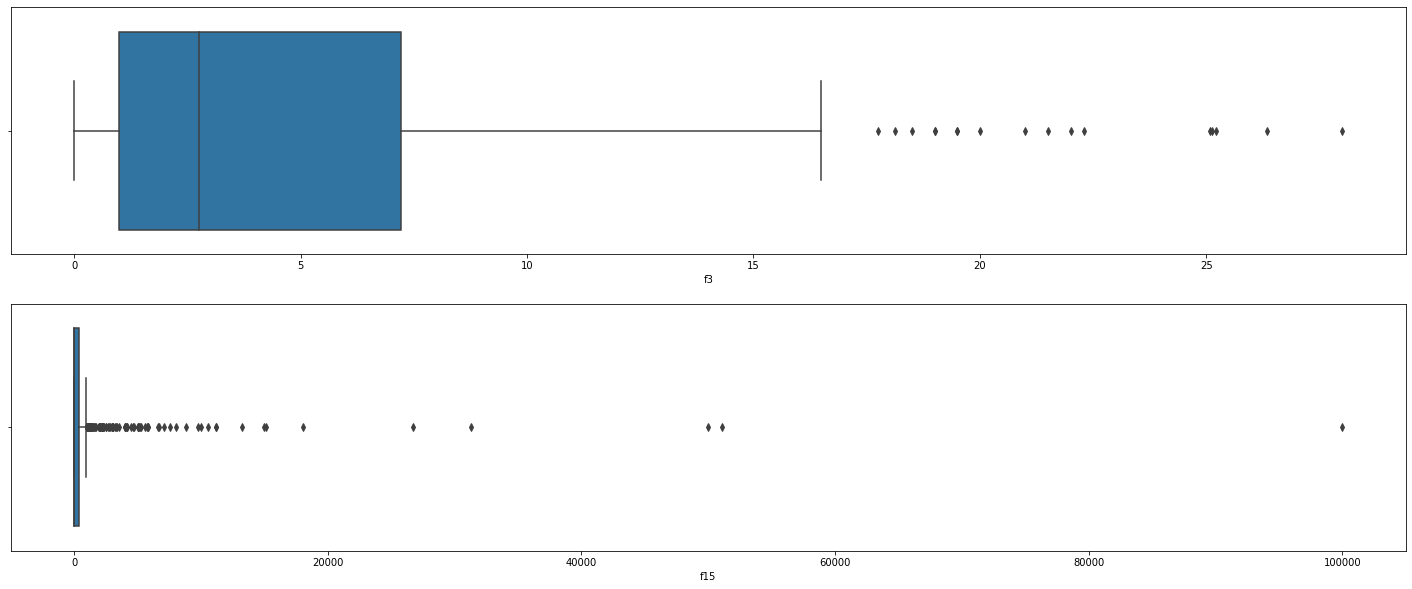

<Figure size 432x288 with 0 Axes>

In [80]:
box_plot_f3 = None
box_plot_f15 = None
col_outliers = None

# YOUR CODE HERE
# raise NotImplementedError()

fig, ax = plt.subplots(2, 1, figsize=(25, 10))
plt.figure()
box_plot_f3 = sns.boxplot(data['f3'], ax = ax[0], orient='h')
box_plot_f15 = sns.boxplot(data['f15'], ax = ax[1], orient='h')
plt.show()

col_outliers=['f3', 'f15']

In [97]:
def log_smooth_outliers(data, col_outliers):
    """
    Takes as input a pandas.DataFrame and a list of column names containing outliers.
    For each of those columns, it creates a new column labeled as 'log_'{COL_NAME}
    (where {COL_NAME} is the label in the list) and whose values are obtained by applying
    a smooth log transformation to the original values of {COL_NAME}.
    The smooth log-transformation of a value x is: log(x + 1), so as to avoid any runtime warning
    induced by possible log(0) computation.
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    for i in col_outliers:
        data['log_' + i] = data[i].apply(lambda x: np.log(x+1))
    return data

In [98]:
"""
Test the correctness of the `box_plot_f11`, `box_plot_f15`, `outliers` and `log_smooth_outliers`
"""

log_smooth_data = log_smooth_outliers(data, col_outliers)

assert_equal(False, (box_plot_f3 == None))
assert_equal(False, (box_plot_f15 == None))
assert_equal(False, (col_outliers == None))
